In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
!pip install cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [77]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import numpy as np
from time import time
import math
import random
import matplotlib.pyplot as plt
import cv2
import scipy
import scipy.spatial
import scipy.io
import mediapipe as mp
import sklearn

In [80]:
filename1 = "/content/drive/MyDrive/visionProject/ted_cruz.jpg"
filename2 = "/content/drive/MyDrive/visionProject/hillary_clinton.jpg"
filename3 = "/content/drive/MyDrive/visionProject/donald_trump.jpg"

In [81]:
# Read images
img1 = cv2.imread(filename1)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(filename2)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.imread(filename3)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

In [82]:
from drive.MyDrive.visionProject.helpers import *
points1 = getFaceLandmarks(img1)
points2 = getFaceLandmarks(img2)
points3 = getFaceLandmarks(img3)

In [83]:
img1 = np.float32(img1)
img2 = np.float32(img2)
img3 = np.float32(img3)

In [84]:
alpha = 1.
points = []

for i in range(0, len(points1)):
    x = (1 - alpha) * points1[i][0] + alpha * points2[i][0]
    y = (1 - alpha) * points1[i][1] + alpha * points2[i][1]
    points.append((x, y))

tri = scipy.spatial.Delaunay(points)

imgMorph = np.zeros(img1.shape, dtype=img1.dtype)
for v in tri.simplices:
    x = v[0]
    y = v[1]
    z = v[2]

    t1 = [points1[x], points1[y], points1[z]]
    t2 = [points2[x], points2[y], points2[z]]
    t = [points[x], points[y], points[z]]

    morphTriangle(img1, img2, imgMorph, t1, t2, t, alpha)

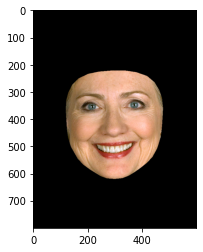

In [85]:
plt.imshow(np.uint8(imgMorph))

CPU times: user 895 ms, sys: 23.9 ms, total: 919 ms
Wall time: 1.05 s


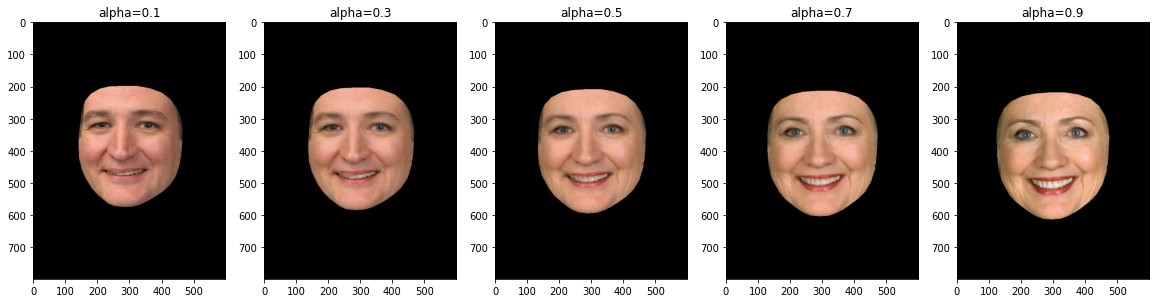

In [86]:
%%time
plt.figure(figsize=(20,20))
ix = 1
for alpha in [0.1, 0.3, 0.5 , 0.7, 0.9]:
  points = []
  for i in range(0, len(points1)):
      x = (1 - alpha) * points1[i][0] + alpha * points2[i][0]
      y = (1 - alpha) * points1[i][1] + alpha * points2[i][1]
      points.append((x, y))
  tri = scipy.spatial.Delaunay(points)
  imgMorph = np.zeros(img1.shape, dtype=img1.dtype)
  for v in tri.simplices:
      x = v[0]
      y = v[1]
      z = v[2]

      t1 = [points1[x], points1[y], points1[z]]
      t2 = [points2[x], points2[y], points2[z]]
      t = [points[x], points[y], points[z]]

      # Morph one triangle at a time.
      morphTriangle(img1, img2, imgMorph, t1, t2, t, alpha)
  plt.subplot(1,5, ix)
  plt.imshow(np.uint8(imgMorph))
  plt.title(f"alpha={alpha}")
  ix += 1

CPU times: user 891 ms, sys: 33.8 ms, total: 924 ms
Wall time: 934 ms


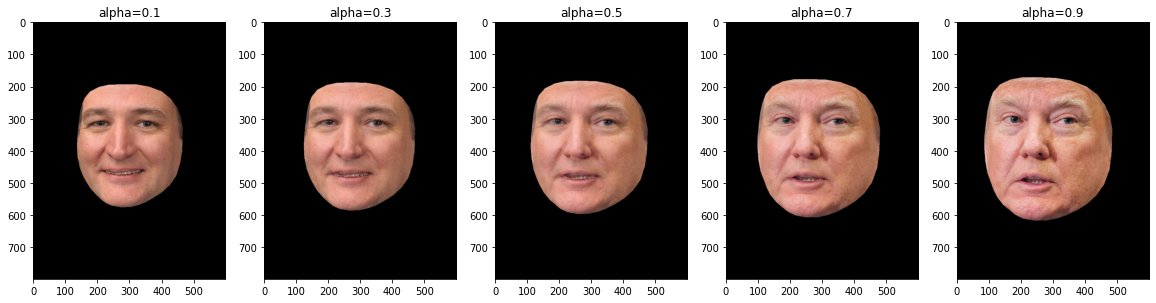

In [87]:
%%time
plt.figure(figsize=(20,20))
ix = 1
for alpha in [0.1, 0.3, 0.5 , 0.7, 0.9]:
  points = []
  for i in range(0, len(points1)):
      x = (1 - alpha) * points1[i][0] + alpha * points3[i][0]
      y = (1 - alpha) * points1[i][1] + alpha * points3[i][1]
      points.append((x, y))
  tri = scipy.spatial.Delaunay(points)
  imgMorph = np.zeros(img1.shape, dtype=img1.dtype)
  for v in tri.simplices:
      x = v[0]
      y = v[1]
      z = v[2]

      t1 = [points1[x], points1[y], points1[z]]
      t2 = [points3[x], points3[y], points3[z]]
      t = [points[x], points[y], points[z]]

      # Morph one triangle at a time.
      morphTriangle(img1, img3, imgMorph, t1, t2, t, alpha)
  plt.subplot(1,5, ix) 
  plt.imshow(np.uint8(imgMorph))
  plt.title(f"alpha={alpha}")
  ix += 1

# EIGENFACE OPTIMIZATION USING MORPHING 

In [88]:
import tarfile
import pylab as pl
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [89]:
!wget http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz 

--2023-02-10 10:59:59--  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243346528 (232M) [application/x-gzip]
Saving to: ‘lfw-funneled.tgz.1’

lfw-funneled.tgz.1  100%[===================>] 232.07M  53.9MB/s    in 4.6s    

2023-02-10 11:00:03 (50.4 MB/s) - ‘lfw-funneled.tgz.1’ saved [243346528/243346528]



In [90]:
tfile = tarfile.open("lfw-funneled.tgz", "r:gz")
tfile.extractall(".")

In [91]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, color = True)

In [92]:
lfw_people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [93]:
n_samples, h, w, ch = lfw_people.images.shape
print(n_samples, h, w, ch)

1288 62 47 3


In [94]:
X = lfw_people.images
y = lfw_people.target
lookup = lfw_people.target_names
lookup

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=22)

In [96]:
def plot_gallery(images, titles, h, w, ch, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(np.uint8(images[i].reshape((h, w, ch))), cmap=pl.cm.gray)
        pl.title(lookup[titles[i]], size=12)
        pl.xticks(())
        pl.yticks(())

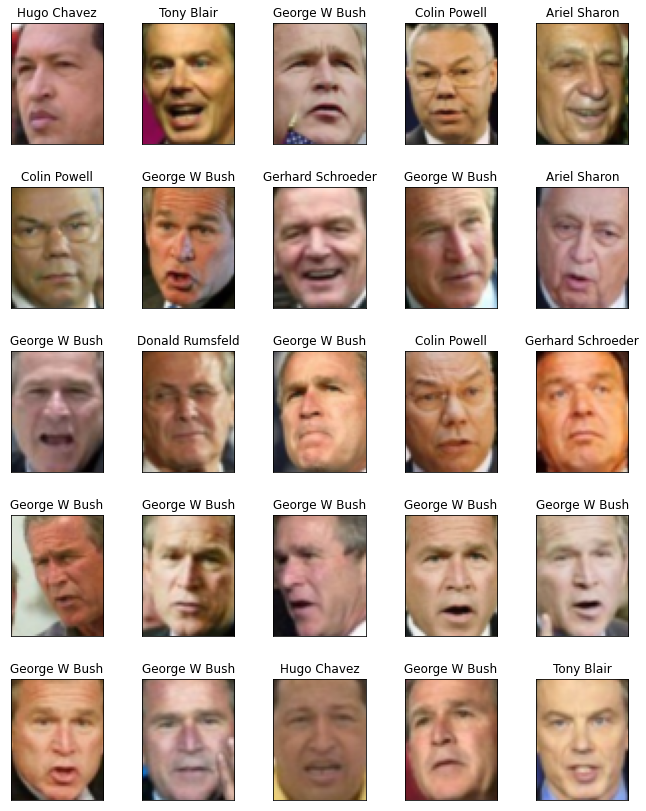

In [97]:
plot_gallery(X, y, h, w, ch, n_row=5, n_col=5)

# WITHOUT OPTIMIZATION

In [98]:
X_train_gray = np.sum(X_train, axis=3) / 3
X_train_gray = np.reshape(X_train_gray, (X_train_gray.shape[0],-1))
X_train_gray_mean = np.sum(X_train_gray, axis=0) / np.size(X_train_gray, 0)

In [99]:
X_test_gray = np.sum(X_test, axis=3) / 3
X_test_gray = np.reshape(X_test_gray, (X_test_gray.shape[0],-1))

In [100]:
def as_row_matrix (X):
    if len (X) == 0:
        return np. array ([])
    mat = np. empty ((0 , X [0].size ), dtype =X [0]. dtype )
    for row in X:
        mat = np.vstack(( mat , np.asarray( row ).reshape(1 , -1))) # 1 x r*c 
    return mat

In [101]:
def get_number_of_components_to_preserve_variance(eigenvalues, variance=.95):
    for ii, eigen_value_cumsum in enumerate(np.cumsum(eigenvalues) / np.sum(eigenvalues)):
        if eigen_value_cumsum > variance:
            return ii

In [102]:
def pca (X, y, num_components =0):
    [n,d] = X.shape
    if ( num_components <= 0) or ( num_components >n):
        num_components = n
        mu = X.mean( axis =0)
        X = X - mu
    if n>d:
        C = np.dot(X.T,X) # Covariance Matrix
        [ eigenvalues , eigenvectors ] = np.linalg.eigh(C)
    else :
        C = np.dot (X,X.T) # Covariance Matrix
        [ eigenvalues , eigenvectors ] = np.linalg.eigh(C)
        eigenvectors = np.dot(X.T, eigenvectors )
        for i in range (n):
            eigenvectors [:,i] = eigenvectors [:,i]/ np.linalg.norm( eigenvectors [:,i])
    # sort eigenvectors descending by their eigenvalue
    idx = np.argsort (- eigenvalues )
    eigenvalues = eigenvalues [idx ]
    eigenvectors = eigenvectors [:, idx ]
    num_components = get_number_of_components_to_preserve_variance(eigenvalues)
    # select only num_components
    eigenvalues = eigenvalues [0: num_components ].copy ()
    eigenvectors = eigenvectors [: ,0: num_components ].copy ()
    return [ eigenvalues , eigenvectors , mu] 

In [103]:
[eigenvalues, eigenvectors, mean] = pca(as_row_matrix(X_train_gray), y_train)

In [104]:
def subplot ( title , images , rows , cols , sptitle ="", sptitles =[] , colormap = plt.cm.gray, filename = None, figsize = (10, 10) ):
    fig = plt.figure(figsize = figsize)
    # main title
    fig.text (.5 , .95 , title , horizontalalignment ="center")
    for i in range ( len ( images )):
        ax0 = fig.add_subplot( rows , cols ,( i +1))
        plt.setp ( ax0.get_xticklabels() , visible = False )
        plt.setp ( ax0.get_yticklabels() , visible = False )
        if len ( sptitles ) == len ( images ):
            plt.title("%s #%s" % ( sptitle , str ( sptitles [i ]) )  )
        else:
            plt.title("%s #%d" % ( sptitle , (i +1) )  )
        plt.imshow(np.asarray(images[i]) , cmap = colormap )
    if filename is None :
        plt.show()
    else:
        fig.savefig( filename )

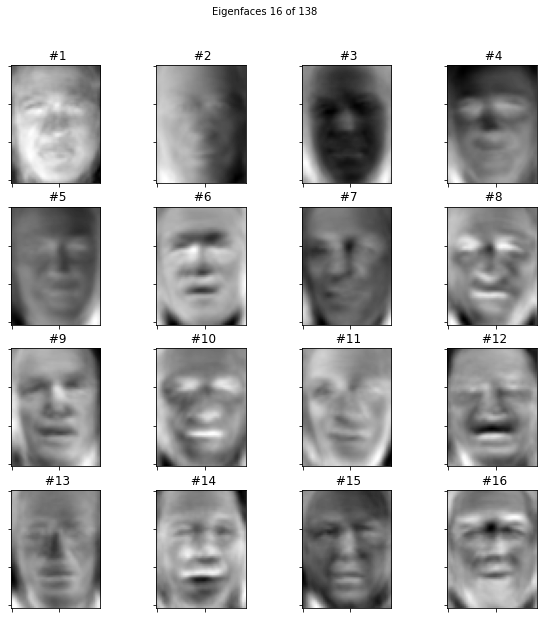

In [105]:
E = []
number = eigenvectors.shape[1]
for i in range (min(number, 16)):
    e = eigenvectors[:,i].reshape((h, w))
    E.append(np.asarray(e))
# plot them and store the plot to " python_eigenfaces .pdf"
subplot ( title = f"Eigenfaces 16 of {number}", images=E, rows =4, cols =4, colormap =plt.cm.gray , filename ="python_pca_eigenfaces.png")

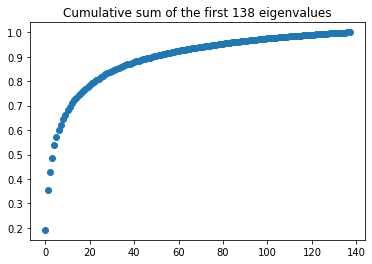

In [106]:
def get_eigen_value_distribution(eigenvectors):
    return np.cumsum(eigenvectors) / np.sum(eigenvectors)

def plot_eigen_value_distribution(eigenvectors, interval):
    plt.scatter(interval, get_eigen_value_distribution(eigenvectors)[interval])

plot_eigen_value_distribution(eigenvalues, range(0, number))
plt.title("Cumulative sum of the first {0} eigenvalues".format(number))
plt.show()

In [107]:
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

[eigenvalues_small, eigenvectors_small, mean_small] = pca (as_row_matrix(X_train_gray), y_train)

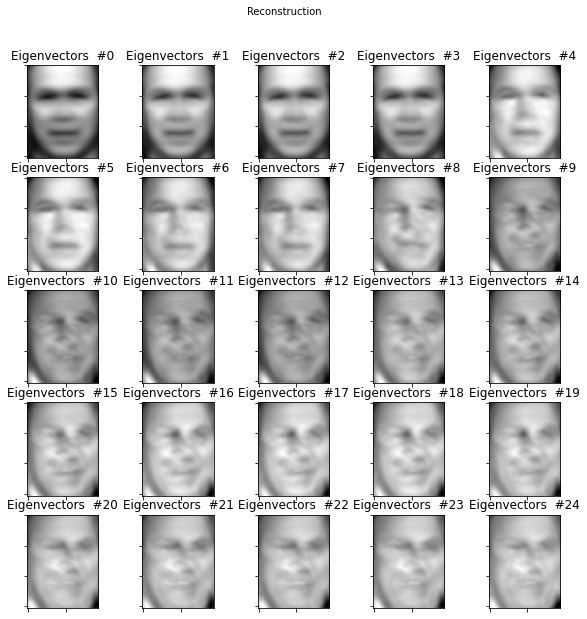

In [108]:
steps = [i for i in range(25)]
E = []
for i in range (len(steps)):
    numEvs = steps[i]
    P = project(eigenvectors_small[: ,0: numEvs ], X_test_gray[0].reshape (1 , -1) , mean_small)
    R = reconstruct(eigenvectors_small[: ,0: numEvs ], P, mean_small)
    # reshape and append to plots
    R = R.reshape((h,w))
    E.append(np.asarray(R))
subplot ( title ="Reconstruction", images=E, rows =5, cols =5, 
         sptitle ="Eigenvectors ", sptitles =steps , colormap =plt.cm.gray , filename ="python_pca_reconstruction.png")

In [109]:
numEvs = 138
P = project(eigenvectors_small[: ,0: numEvs ], X_test_gray[0].reshape (1 , -1) , mean_small)
R = reconstruct(eigenvectors_small[: ,0: numEvs ], P, mean_small)

Text(0.5, 1.0, 'Original')

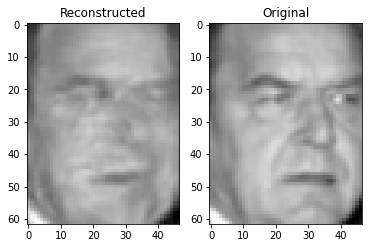

In [110]:
plt.subplot(1,2,1)
plt.imshow(R.reshape((h,w)), plt.cm.gray)
plt.title("Reconstructed")
plt.subplot(1,2,2)
plt.imshow(X_test_gray[0].reshape((h,w)), plt.cm.gray)
plt.title("Original")

In [111]:
def dist_metric(p,q):
    p = np.asarray(p).flatten()
    q = np.asarray (q).flatten()
    return np.sqrt (np.sum (np. power ((p-q) ,2)))

def predict (W, mu , projections, y, X):
    minDist = float("inf")
    minClass = -1
    Q = project (W, X.reshape (1 , -1) , mu)
    for i in range (len(projections)):
        dist = dist_metric( projections[i], Q)
        if dist < minDist:
            minDist = dist
            minClass = i
    return minClass

In [112]:
y_pred = []
projections = []

for xi in X_train_gray:
    projections.append(project (eigenvectors, xi.reshape(1 , -1) , mean))

for i in range(X_test_gray.shape[0]):
  xi = X_test_gray[i].reshape((1,-1))
  y_pred.append(
      predict(eigenvectors, mean, projections, y_test, xi)
  )

In [113]:
y_pred = y_train[y_pred]

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.43      0.40        37
           1       0.53      0.57      0.55       115
           2       0.26      0.24      0.25        63
           3       0.61      0.69      0.65       248
           4       0.38      0.32      0.35        60
           5       0.54      0.39      0.45        36
           6       0.42      0.31      0.35        85

    accuracy                           0.51       644
   macro avg       0.44      0.42      0.43       644
weighted avg       0.50      0.51      0.50       644



In [115]:
sklearn.metrics.confusion_matrix(y_test, y_pred, labels=np.arange(7)+1)

array([[ 66,  11,  18,   6,   1,   4,   0],
       [ 10,  15,  22,   3,   2,   3,   0],
       [ 22,  19, 170,   8,   6,  16,   0],
       [  4,   2,  25,  19,   2,   7,   0],
       [  4,   0,   7,   6,  14,   5,   0],
       [ 12,   9,  28,   7,   0,  26,   0],
       [  0,   0,   0,   0,   0,   0,   0]])

# WITHOUT OPTIMIZATION - AN EASIER VERSION

In [116]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist

# Load the face dataset
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.3)
X = faces.data
y = faces.target

# Split the data into training and test sets
#X = np.delete(X, toRemove, 0)
#y = np.delete(y, toRemove)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Perform PCA on the training data
pca = PCA(n_components=150)
X_train_pca = pca.fit_transform(X_train)

# Apply the PCA transformation on the test data
X_test_pca = pca.transform(X_test)

# Initialize an empty list to store the predictions
y_pred = []

# Loop through the test data
for i in range(X_test_pca.shape[0]):
    # Get the current test image
    test_image = X_test_pca[i, :]
    # Calculate the euclidean distance between the test image and the training images
    distances = cdist(X_train_pca, [test_image], metric='euclidean')
    # Get the index of the closest image
    closest_image_index = np.argmin(distances)
    # Append the label of the closest image to the predictions list
    y_pred.append(y_train[closest_image_index])

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.5813953488372093


In [117]:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[ 6,  4,  1,  6,  0,  0,  1],
       [ 2, 28,  8,  5,  0,  0,  2],
       [ 3,  5, 11,  2,  1,  1,  2],
       [ 1,  8,  5, 70,  2,  3,  6],
       [ 0,  3,  1,  7, 12,  1,  3],
       [ 0,  3,  0,  3,  0,  7,  1],
       [ 0,  2,  2, 10,  4,  0, 16]])

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40        18
           1       0.53      0.62      0.57        45
           2       0.39      0.44      0.42        25
           3       0.68      0.74      0.71        95
           4       0.63      0.44      0.52        27
           5       0.58      0.50      0.54        14
           6       0.52      0.47      0.49        34

    accuracy                           0.58       258
   macro avg       0.55      0.51      0.52       258
weighted avg       0.58      0.58      0.58       258



# WITH OPTIMIZATION

In [119]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist

# Load the face dataset, COLOR for facemorphing
faces = fetch_lfw_people(min_faces_per_person=70, color=True, resize=0.3)
X = faces.images
y = faces.target

In [120]:
# Get Affine Transformation to average face locations
AVG = np.sum(X,axis=0)/X.shape[0]
AVG = np.uint8(AVG)
imgMorph = np.zeros(AVG.shape, dtype=AVG.dtype)
alpha = 1.0
img0 = np.uint8(X[20])
points0 = getFaceLandmarks(AVG, 0.1, 0.1)

Text(0.5, 1.0, 'Average Face Landmarks')

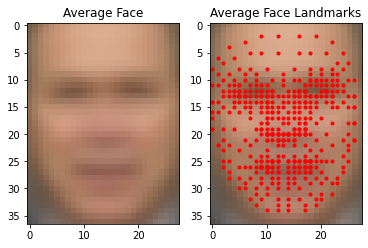

In [121]:
plt.subplot(1,2,1)
plt.imshow(np.uint8(AVG))
plt.title("Average Face")
plt.subplot(1,2,2)
plt.imshow(AVG)
for p in points0:
  plt.plot(p[0], p[1], "r.")
plt.title("Average Face Landmarks")

In [122]:
# DETECT THE FACE LANDMARKS
mp_face_mesh = mp.solutions.face_mesh

face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    min_detection_confidence=0.5,
)
toRemove = []
for i in range(X.shape[0]):
  image = np.uint8(X[i])
  try:
    image.flags.writeable = False
    # Detect the face landmarks
    results = face_mesh.process(image)
    # To improve performance
    image.flags.writeable = True

    points = [
        [int(l.x * image.shape[1]), int(l.y * image.shape[0])]
        for l in results.multi_face_landmarks[0].landmark
    ]
    tri = scipy.spatial.Delaunay(points, incremental=True, )
    imgMorph = np.zeros(AVG.shape, dtype=AVG.dtype)
    
    for v in tri.simplices:
        x = v[0]
        y = v[1]
        z = v[2]

        t1 = [points0[x], points0[y], points0[z]]
        t2 = [points[x], points[y], points[z]]
        t = [points0[x], points0[y], points0[z]]

        # Morph one triangle at a time.
        morphTriangle(AVG, image, imgMorph, t1, t2, t, alpha)
        X[i] = imgMorph.copy()
  except:
    toRemove.append(i)
    continue

In [123]:
len(X),len(toRemove)

(1288, 455)

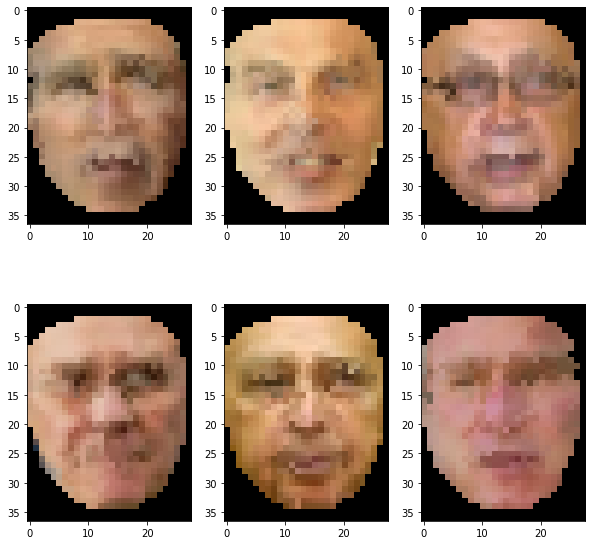

In [124]:
plt.figure(figsize=(10,10))
for i in range(1,7):
  plt.subplot(2, 3, i)
  plt.imshow(np.uint8(X[i+50]))

In [125]:
y = faces.target

In [126]:
# Create Non-COLOR for EigenFace
(h, w, ch) = X[0].shape
X_g = (np.sum(X, axis=-1)/3).reshape((len(X),-1))

X_g = np.delete(X_g, toRemove, 0)
y_g = np.delete(y, toRemove)

# Split the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X_g, y_g, test_size=0.2)

# Perform PCA on the training data
pca = PCA(n_components=150)
X_train_pca = pca.fit_transform(X_train)

# Apply the PCA transformation on the test data
X_test_pca = pca.transform(X_test)

# Initialize an empty list to store the predictions
y_pred = []

# Loop through the test data
for i in range(X_test_pca.shape[0]):
    # Get the current test image
    test_image = X_test_pca[i, :]
    # Calculate the euclidean distance between the test image and the training images
    distances = cdist(X_train_pca, [test_image], metric='euclidean')
    # Get the index of the closest image
    closest_image_index = np.argmin(distances)
    # Append the label of the closest image to the predictions list
    y_pred.append(y_train[closest_image_index])

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.6526946107784432


In [127]:
print(confusion_matrix(y_test, y_pred))

[[ 1  0  0  2  1  0  0]
 [ 0  5  0  4  1  0  0]
 [ 0  0 12  4  1  0  2]
 [ 1  2  2 71  1  2  5]
 [ 1  0  0  5  2  0  4]
 [ 1  1  1  3  1  4  3]
 [ 0  1  1  6  1  1 14]]


In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.56      0.50      0.53        10
           2       0.75      0.63      0.69        19
           3       0.75      0.85      0.79        84
           4       0.25      0.17      0.20        12
           5       0.57      0.29      0.38        14
           6       0.50      0.58      0.54        24

    accuracy                           0.65       167
   macro avg       0.52      0.47      0.48       167
weighted avg       0.64      0.65      0.64       167

